# Boston House Prices Prediction
- Kaggle 連結: https://www.kaggle.com/vikrishnan/boston-house-prices
    - 供參考用，本次作業使用 scikit-learn 內裝的 dataset

## 繳交規則

1. 請將**當前資料夾**命名為 `FDA_HW3_你的學號`
    - 例如：`FDA_HW3_F12345678`
    - 所有**英文**都必須**大寫**
    - 所有**文字**都必須在 **ASCII** 範圍
2. 請將本檔案命名為 `main.ipynb`
3. 請描述開發所需要的**環境**，包含：
    - **作業系統**與**發行版本**
        - 例如：Windows、Mac、Linux 等
        - 需要填寫系統**名稱**與**版本**
    - **程式執行環境**
        - 例如：jupyter、kaggle kernel、colab 等
        - 如果是 jupyter 請**填寫**版本
        - 如果是雲端計算資源**不需填寫**版本
        - 請**勿**使用**付費**資源，助教薪水**微薄**
    - **python 版本**
        - 例如：3.6.9
        - 填寫**至少**能執行的版本即可
    - **安裝環境**
        - 例如使用 `pip`、`conda` 等
        - 助教會以虛擬環境測試
    - **安裝套件**與**版本**
        - 請使用 `requirements.txt`
        - 助教會以虛擬環境測試
        - 請**不要**附上**多餘**的套件
    - **計算資源**
        - 使用 CPU **數量**
        - GPU 版本
    - **執行**所需花費**時間**
        - 請**不要更改**擁有註解 `請勿更動此區塊程式碼` 的程式碼區塊
4. 請**保留執行結果**讓助教可以直接觀看
    - 請記得使用 **Save**
    - **雲端**計算資源請**儲存**後**下載**檔案
    - 所有程式區塊**必須依序執行**
    - 請**不要**保留**多餘**的程式區塊
5. 請**控制隨機亂數**讓實驗結果可以**重現**
    - 關鍵字：**random seed**
6. 請**不要**上傳**多餘**的檔案
    - 不要上傳**隱藏**檔案，包含 `.git`、`.ipynb_checkpoints` 等
    - 不要上傳**虛擬環境**
7. 請附上**參考連結**
    - 可以參考公開的 kernel
    - 沒附上連結者視同**瓢竊**
    - 使用的**演算法**請附上來源，並大致描述概念
8. 請**壓縮**成 `zip` 並上傳至 [moodle](http://moodle.ncku.edu.tw/)
    - 例如 `FDA_HW3_F12345678.zip`

## 評分標準

如果有參考其他作法卻沒有附上來源，則直接視為瓢竊，得分為 $-\infty$。

### 扣分標準

|規則|沒滿足規則失分|
|-|-|
|資料夾名稱符合繳交規則|-5|
|檔案名稱符合繳交規則|-5|
|填寫環境需求|-0|
|填寫計算資源|-0|
|提供 `requirements.txt`|-5|
|將資料夾壓縮成 `zip`|-5|
|不更改擁有註解 `請勿更動此區塊程式碼` 的程式碼區塊|-5|
|計算並顯示執行時間|-5|
|控制隨機亂數讓實驗結果可以重現|-5|

### 得分標準

|規則|滿足規則得分|
|-|-|
|在需要進行說明的cell以markdown語法進行說明|0|
|TODO #1: 整理資料|+5|
|TODO #2: 請進行統計各個 feature 的缺失值數目|+5|
|TODO #3: 利用 Seaborn 畫箱型圖|+10|
|TODO #4: 利用 Seaborn 進行 Heatmap 作圖|+10|
|TODO #5: 挑選特徵|+10|
|TODO #6: 呈現特徵分佈|+10|
|TODO #7: 切分資料|+10|
|TODO #8: 訓練 Linear Regression 模型|+10|
|TODO #9: 訓練 Random Forest Regressor 模型|+10|
|TODO #10: 參數調整|+10|
|TODO #11: 訓練 其他的 regression 模型|+10|
|(Bonus) TODO #12: 超越助教的分數|+10|

In [71]:
# 請勿更動此區塊程式碼

import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [72]:
# 載入必要套件

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

## 載入資料

In [73]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [74]:
# 觀察資料的 key 值有哪些

print(dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## 資料前處理
### TODO #1: 
- 請將資料以 Pandas 整理成 DataFrame 的型式
- 欄位名稱為 feature_names

In [75]:
df = pd.DataFrame(
    # Please put something here.
    data = dataset['data'],
    columns = dataset['feature_names']
)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [76]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [77]:
df['MEDV'] = dataset.target

In [78]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### TODO #2: 請進行統計各個 feature 的缺失值數目

In [79]:
# Please use some functions of Pandas here.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

## 觀察資料的特性

### TODO #3: 利用 Seaborn 畫箱型圖，並進行說明
- 觀察每一個 features 的數值分佈
- 可以用來決定是否要對資料的數值進行標準化

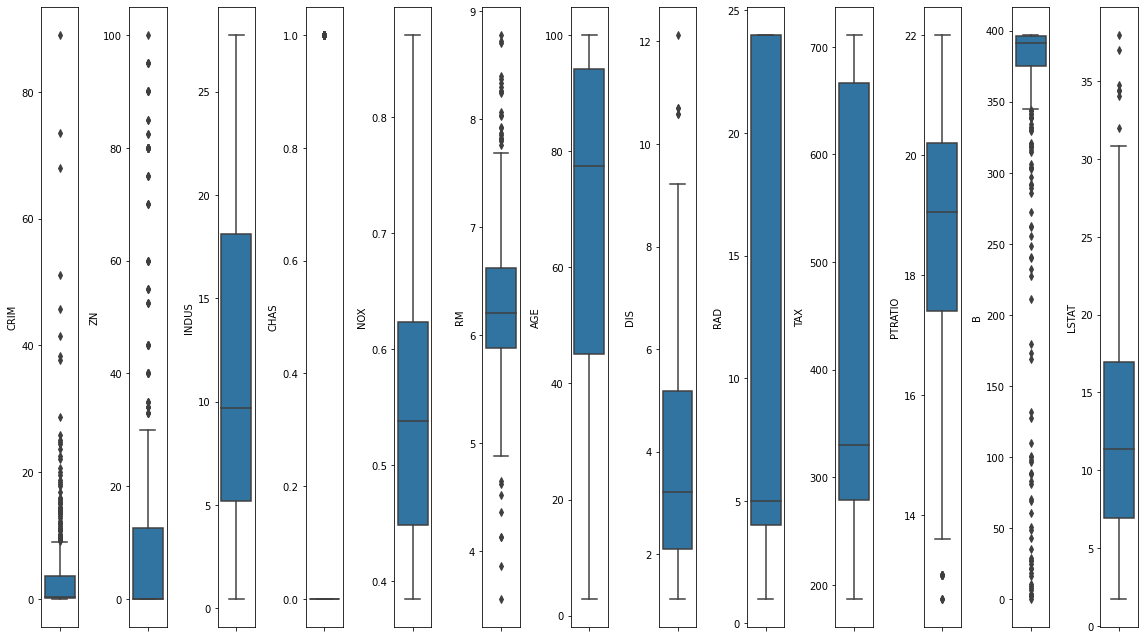

In [81]:
plt.figure(figsize=(16, 9))
# Plot a boxplot with Seaborn
for idx,feature in enumerate(dataset['feature_names'],1):
    plt.subplot(1,len(dataset['feature_names']),idx)
    sns.boxplot(y = df[feature] , data = df)
plt.tight_layout()


### TODO #4: 利用 Seaborn 進行 Heatmap 作圖，並進行說明
- 觀察每一個特徵與房價 (MEDV) 的關聯程度
- 使用 dr.corr() 來計算 feature 和 feature 之間的關係係數
- 數值愈高表示愈正相關，數值愈低表示愈負相關

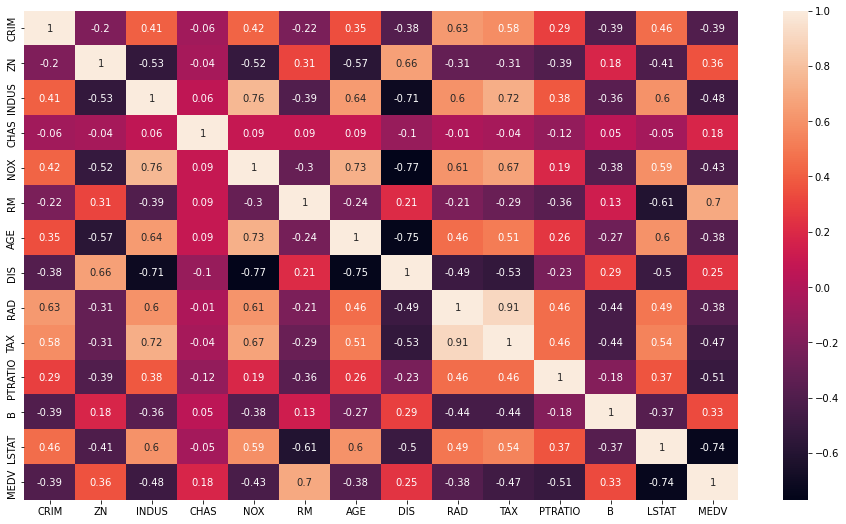

In [82]:
plt.figure(figsize=(16, 9))
# Please use a function of Pandas here.
heatmap = df.corr().round(2)
# Plot a heatmap with Seaborn
sns.heatmap(heatmap,annot=True)

### TODO #5: 挑選特徵，並進行說明
- 觀察 heatmap 中具有"顯著"正相關或是"顯著"負相關的特徵
- 把這些特徵進行 concatenation，得到新的 dataframe

In [83]:
data = {'RM':df['RM'],'LSTAT':df['LSTAT']}
X = pd.DataFrame(data = data)
print(X)

        RM  LSTAT  INDUS   AGE
0    6.575   4.98   2.31  65.2
1    6.421   9.14   7.07  78.9
2    7.185   4.03   7.07  61.1
3    6.998   2.94   2.18  45.8
4    7.147   5.33   2.18  54.2
..     ...    ...    ...   ...
501  6.593   9.67  11.93  69.1
502  6.120   9.08  11.93  76.7
503  6.976   5.64  11.93  91.0
504  6.794   6.48  11.93  89.3
505  6.030   7.88  11.93  80.8

[506 rows x 4 columns]


## Feature挑選說明
#### 繪製出heatmap後，因為我們要做的是房價預測，因此需要尋找與MEDV這項相關性最強得幾個feature(接近+1 or 接近-1)，我們可以focus在MEDV這一列，可以發現RM與LSTAT這兩項是與MEDV有較高相關性的(分別為0.7與-0.74)因此選取這兩項資料作為新的dataframe X來做接下來的模型訓練

### TODO #6: 呈現特徵分佈，並進行說明
- 把你選取到的"重要特徵"進行subplots，畫出散佈圖 (scatter plots)
- 每一張圖的X軸是你選到的特徵、Y軸是房價('MEDV')

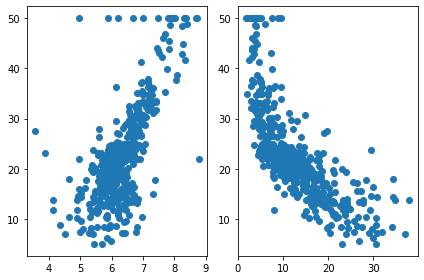

In [84]:
# Please plot subplots here
plt.subplot(1,2,1)
plt.scatter(X['RM'],df['MEDV'])
plt.subplot(1,2,2)
plt.scatter(X['LSTAT'],df['MEDV'])
plt.tight_layout()



## 訓練模型前的準備
### TODO #7: 切分資料
- 利用 train_test_split，將資料切成 train set 和 test set
- 設定 train set 的比例為全部資料的 80%
- 請記得設定 random_state 以控制隨機過程

In [85]:
from sklearn.model_selection import train_test_split
rm = np.reshape(np.array(X['RM']),(-1,1))
lstat = np.reshape(np.array(X['LSTAT']),(-1,1))
data = np.concatenate((rm,lstat),axis = 1)

X_train, X_test , Y_train, Y_test = train_test_split(data,np.array(df['MEDV']), random_state=1, train_size=0.8)
print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(404, 2)
(102, 2)
(404,)
(102,)


## 訓練模型並進行評估

### TODO #8: 訓練 Linear Regression 模型，並說明訓練結果
- 利用 scikit-learn，將資料 fit 在 LinearRegression
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [86]:
# Modeling
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)



Text(0, 0.5, 'Y_True')

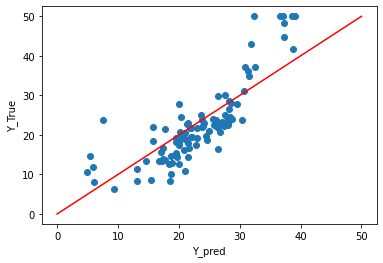

In [87]:
# plotting the y_test vs y_pred
plt.scatter(Y_pred,Y_test)
plt.plot([0,10,20,30,40,50],[0,10,20,30,40,50],'red') #x = y
plt.xlabel('Y_pred')
plt.ylabel('Y_True')




## 結果說明
#### 由於X軸為預測結果，而Y軸為實際房價，因此，當散步圖越接近x = y這條線(途中紅線)時意味著預測結果越準確，由圖中可以看見，當預測房價落在10-30這個區間時的可信度會必較高(較接近實際房價)

### TODO #9: 訓練 Random Forest Regressor 模型
- 利用 scikit-learn，將資料 fit 在 RandomForestRegressor 模型
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
# Modeling
model = RandomForestRegressor()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)




Text(0, 0.5, 'Y_True')

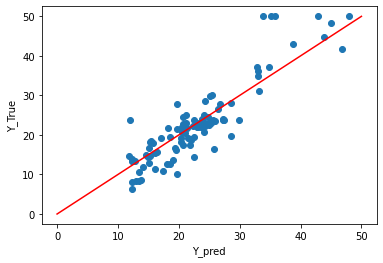

In [90]:
# plotting the y_test vs y_pred
plt.scatter(Y_pred,Y_test)
plt.plot([0,10,20,30,40,50],[0,10,20,30,40,50],'red') #x = y
plt.xlabel('Y_pred')
plt.ylabel('Y_True')



### TODO #10: 參數調整，並進行說明
- 請嘗試使用 Grid search 來進行調參
    - 可以自己寫 for-loop
    - 或是使用 sklearn.model_selection 中的 GridSearchCV 函式

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
n_estimators = [10,50,100,200]
min_samples_split = [3,6,9]
param_grid = {'n_estimators':n_estimators,'min_samples_split':min_samples_split}

gridSearchCV = GridSearchCV(RandomForestRegressor(random_state=0),param_grid=param_grid,cv = 5)

gridSearchCV.fit(X_train,Y_train)

gridSearchCV.scorer_,gridSearchCV.best_params_,gridSearchCV.best_score_

(<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
 {'min_samples_split': 9, 'n_estimators': 50},
 0.7265802850442669)

Text(0, 0.5, 'Y_True')

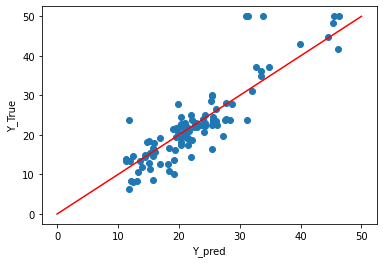

In [93]:
Y_pred = gridSearchCV.predict(X_test)
# plotting the y_test vs y_pred
plt.scatter(Y_pred,Y_test)
plt.plot([0,10,20,30,40,50],[0,10,20,30,40,50],'red') #x = y
plt.xlabel('Y_pred')
plt.ylabel('Y_True')


### TODO #11: 訓練 其他的 regression 模型，與上述兩種模型比較並說明訓練結果
- 將資料 fit 在其他的迴歸模型，可選擇 SVR、XGBRegressor 或其他...
- 利用 TODO #10 的工具來進行參數調整
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [94]:
from sklearn.svm import SVR

model = GridSearchCV(SVR())


TypeError: __init__() missing 1 required positional argument: 'param_grid'

### (Bonus) TODO #12: 超越助教的分數，並且說明如何做到
- R2:  0.8831229012211493
- Test loss (MSE):  9.150760226336033

In [ ]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 81.08889436721802
